<h1><center>Multi-layer Perceptron</center></h1>

In this mini-project, we will implement a simple one hidden layer neural network from scratch.
Even if you will use deep learning libraries like Pytorch or Tensorflow later, implementing a network from scratch at least once is an extremely useful exercise, essential for designing and optimizing your own models effectively.


In [ ]:
!pip install numpy
!pip install scikit-learn

# Imports of useful packages
import matplotlib # For the plots
import matplotlib.pyplot as plt
import numpy as np # To perform operations on matrices efficiently


# We will use the sklearn library to compare our neural network to that
# of a simpler approach like logistic regression

import sklearn
import sklearn.datasets
import sklearn.linear_model

from math import exp,log

# To display plots inline and adjust the display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generating a dataset

Let's start by generating a dataset that we can play with. The scikit-learn machine learning library has a few useful data generators, saving us the trouble of writing the code ourselves. We will use the make_moons function, which creates a two-class dataset of two-dimensional examples in the shape of two half-moons: each of the half-moons corresponds to a class.

In [ ]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(n_samples=300, noise=0.20)  # We create a dataset with 300 elements


 <font color='red'><b>Question 1.</b></font> Show the coordinates and labels of the first two elements of the dataset.



In [ ]:
# You can use f-string as proposed below (https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)

print(f"The first coordinate point {X[0]} has a label {y[0]}")
print(f"The second coordinate point {X[1]} has a label {y[1]}")

The first coordinate point [ 0.21073485 -0.0159868 ] has a label 1
The second coordinate point [-0.82910413  0.65187765] has a label 0


We can display this dataset easily using Matplotlib using colors to make the labels appear $y$ :

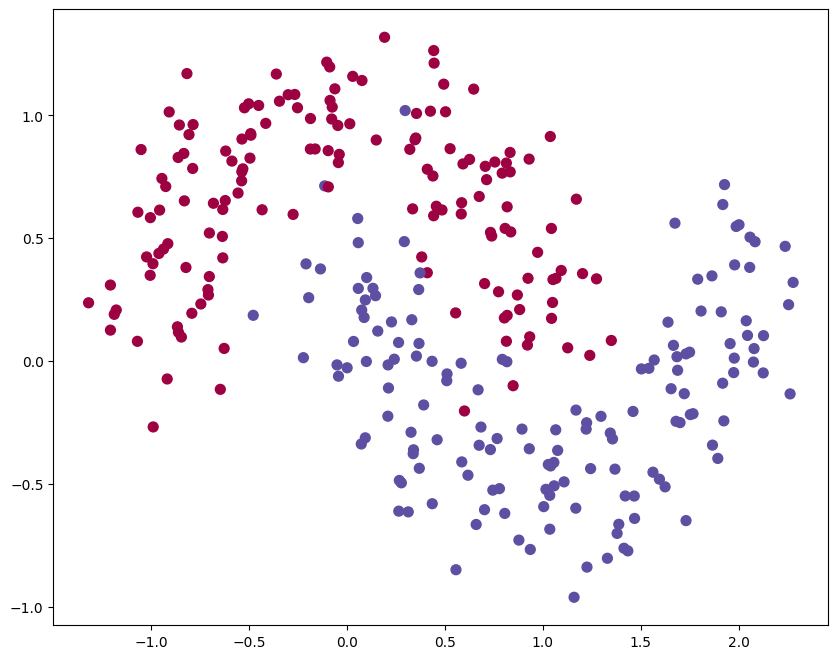

In [ ]:
plt.scatter(X[:,0], X[:,1], s=50, c=y+1, cmap=plt.cm.Spectral)
plt.show()

The dataset we generated has two classes, represented by red and blue dots.

Our goal is to train a classifier that predicts the correct class from point coordinates $x_1$ et $x_2$.

# Find the best line manually

In this part we will try to find the best line that separates our cloud of points manually.

<font color='red'><b>Question 2</b></font>  Creates a function that returns 1 if a coordinate point $(x_1,x_2$) is below the line with slope $a$ and the bias $b$.

In [ ]:
def pred_linear(a: float, b: float, x1: float, x2: float) -> int:
    """Binary linear classifier in 2D.

    Predicts class 1 if the point (x1, x2) is below the line x2 = a*x1 + b, else 0.
    """
    return 1 if x2 < a * x1 + b else 0


It is important to be able to evaluate the performance of our approaches using metrics. Here, we will choose the accuracy which is simply the number of well-classified elements divided by the total number of elements. To learn more about classification metrics like precision, recall and their link with accuracy, you can consult the following excellent Wikipedia (if you plan to do Machine Learning later, the notion of precision/recall is a classic) https://en.wikipedia.org/wiki/Precision_and_recall

<font color='red'><b>Question 3.</b></font> Complete the following accuracy function. (1 Python line with the comprehension of a list)

In [ ]:
def accuracy(y_true, y_pred) -> float:
    """Compute accuracy for binary (or multi-class) labels.

    Args:
        y_true (list[int] | np.ndarray): true labels
        y_pred (list[int] | np.ndarray): predicted labels

    Returns:
        float: proportion of correct predictions
    """
    y_true = list(y_true)
    y_pred = list(y_pred)
    if len(y_true) == 0:
        raise ValueError("y_true is empty.")
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length.")
    return sum(int(yt == yp) for yt, yp in zip(y_true, y_pred)) / len(y_true)


In [ ]:
#### display function
def plot_decision_boundary(pred_func):
    """
    Shows the decision boundaries of a binary prediction function.
    """
    # Set grid dimensions and give some margin for display
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate the grid of points with a distance of h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Drawing the decision boundary
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Show contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

<font color='red'><b>Question 4.</b></font>  Play by hand with parameters $a$ and $b$ to obtain several linear decision boundaries and try to obtain at least 80% accuracy.



le score obtenu est de:  0.8633333333333333


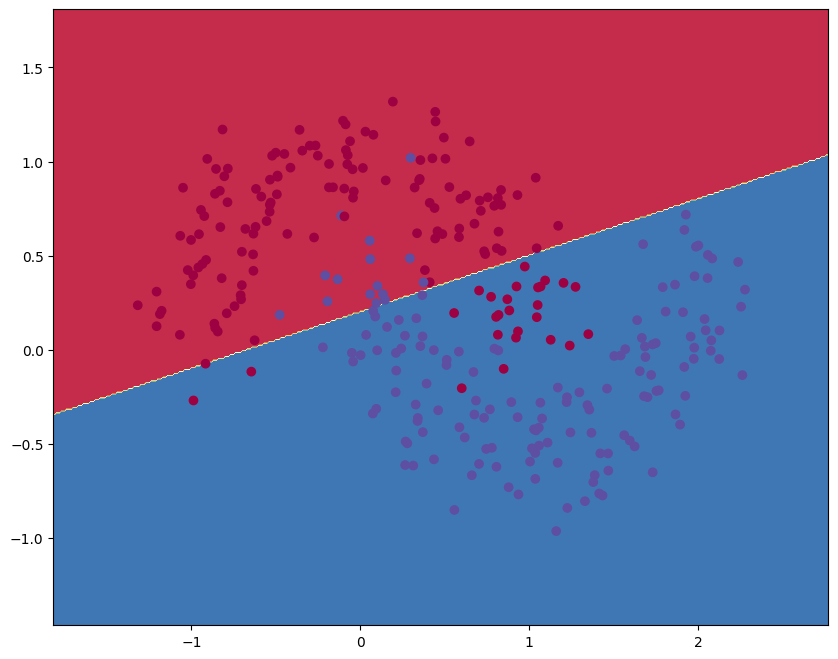

In [ ]:
a = 0.3
b = 0.2
def prediction(A, a, b, func):
    return np.array([func(a=a, b=b, x1=x[0], x2=x[1]) for x in A])
plot_decision_boundary(lambda x: prediction(x, a, b, pred_linear))
print('le score obtenu est de: ', accuracy(y, prediction(X, a, b, pred_linear)))

# Logistic Regression

Scikit-learn has models such as logistic regression which can find the optimal parameters a and b:

In [ ]:
classifier = sklearn.linear_model.LogisticRegressionCV()

 <font color='red'><b>Question 5.</b></font> Train this logistic regression model on the dataset (X,y). You can use the Scikit-learn documentation to see how to train a model on data: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:

classifier.fit(X, y)


LogisticRegressionCV()

*Once* the model is trained, it can be used to predict and draw the

1.   List item
2.   List item

decision boundary:

le score obtenu est de:  0.8566666666666667


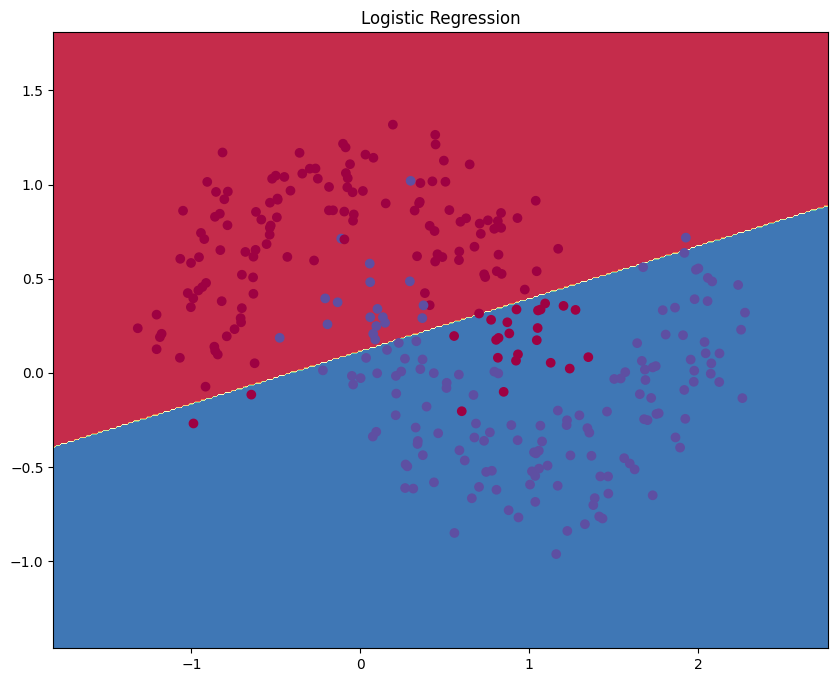

In [ ]:
plot_decision_boundary(lambda x: classifier.predict(x))
plt.title("Logistic Regression")
print('le score obtenu est de: ', accuracy(y, classifier.predict(X)))

 <font color='red'><b>Question 6.</b></font> What do you observe? Was such a result predictable? What can we do to improve our predictions?

On observe que la courbe de la regression est linéaire, et ne sépare pas parfaitement les deux classes.
Pour mieux classer, il faut un modèle non linéaire.

<font color='red'><b>Bonus Question.</b></font> Find the coefficients $a, b$ obtained by Scikit-learn logistic regression.

In [ ]:

# Coefficients de la droite (a) et le biais (b)
print("Coefficient a :", classifier.coef_)
print("Biais b :", classifier.intercept_)


Coefficient a : [[ 1.28640251 -4.60570681]]
Biais b : [0.51730351]


# Neural Networks

You will now create a neural network to solve the previous problem.

In [ ]:
# We will reuse the same datasets as previously, be careful X and y will be global variables for the rest
# (to be avoided in general, but simplifies the notations for this mini porject)
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)

 <font color='red'><b> Question 7</b></font> Complete the following variables and functions to code a **two-layer** neural network (1 hidden layer). The hidden layer will currently have **10 neurons** and we will use a learning rate of 3e-2.


In [ ]:
# number of examples in the training set

N = len(X)
# dimension of the input
d_input = X.shape[1]

# dimension of the output
d_output = 2

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 10



# learning rate for the gradient descente algorithm
epsilon = 3e-2

In [ ]:
X.shape

(300, 2)

 <font color='red'><b> Question 8</b></font> Complete the following function to generate the parameters of our neural network. For this you will use the random library to generate parameters in the interval [-0.5, 0.5] using the random.random() function.

In [ ]:
import random

In [ ]:
def init_model(d_input: int, d_hidden: int, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (int): dimension of the hidden layer
        d_output (int): dimension of the output

    Returns:
        dict: Dictionary containing 4 keys, the weights/biases (W1,b1) and (W2,b2) of the neural network.
        Each of these weights and biases are lists or list of lists of float.
    """
    # Initialization of random parameters
    random.seed(0)
    # First layer of size d_input x d_hidden

    W1 = [[random.random() - 0.5 for _ in range(d_hidden)] for _ in range(d_input)]
    # Bias of the first layer vector of size d_hidden
    b1 = [random.random() - 0.5 for _ in range(d_hidden)]
    # Second layer of size d_hidden x d_output

    W2 = [[random.random() - 0.5 for _ in range(d_output)] for _ in range(d_hidden)]
    # The bias of the second layer
    b2 = [random.random() - 0.5 for _ in range(d_output)]
    # The model returned at the end is a dictionary of weights and biases
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

<font color='red'><b> Question 9</b></font> Implement the following mathematical functions which may be useful later. All vectors $v_1,v_2$ are python lists and the matrices $X$ and $W$ are lists of lists.

In [ ]:
# ---- Linear algebra helpers (pure Python lists) ----

def dot_product(v1, v2):
    """Dot product between two vectors (lists)."""
    return sum(a * b for a, b in zip(v1, v2))

def add_bias(v1, v2):
    """Element-wise addition of two vectors."""
    return [a + b for a, b in zip(v1, v2)]

def get_columns(W, index):
    """Return the 'index'-th column of a matrix W (list of lists)."""
    return [row[index] for row in W]

def transpose(M):
    """Transpose a matrix M (list of lists)."""
    if len(M) == 0:
        return []
    return [get_columns(M, j) for j in range(len(M[0]))]

def matrix_multiplication(X, W):
    """Matrix multiplication X @ W using Python lists.

    X: (n x d) iterable of rows
    W: (d x m) list of lists

    Returns:
        Z: (n x m) list of lists
    """
    # Ensure W is indexable
    if len(W) == 0:
        raise ValueError("W is empty.")
    m = len(W[0])
    WT = transpose(W)  # (m x d)
    Z = []
    for row in X:
        row = list(row)  # works with numpy rows too
        Z.append([dot_product(row, WT[j]) for j in range(m)])
    return Z


 <font color='red'><b> Question 10</b></font> Complete the forward_layer function by doing the following:
 $$ X \times W + b $$
 In which X represents the input, W the weights and and b the biases.
 Complete the sigmoid and feed_forward function.

In [ ]:
def forward_layer(X, W, b):
    """Compute Z = XW + b for a layer, using list-based operations."""
    Z = matrix_multiplication(X, W)          # (n x m)
    Z_plus_b = [add_bias(row, b) for row in Z]
    return Z_plus_b


In [ ]:
def sigmoid(x):
    """"
    Args:
        x (float): input
    returns:
        float : sigmoid(x)

    """
    return 1 / (1 + exp(-x))


In [ ]:
def forward_function(X,W1,b1,W2,b2):

    z1 = forward_layer(X, W1, b1)   # Output of the first layer
    a1 = [[sigmoid(v) for v in row] for row in z1]  # Sigmoid activation of the first layer
    z2 = forward_layer(a1, W2, b2)   # Output of the second layer
    exp_scores = [[exp(v) for v in row] for row in z2]# Compute exp(z2)
    probs = [] #A pply softmax activation function on z2
    for row in exp_scores:
      s = sum(row)
      probs.append([v / s for v in row])
    return probs


In [ ]:
# Test your result:
np.random.seed(1)
model_test = init_model(4,3,2)
X_debug = [[random.random() for i in range(4)]] # Test with an example in dimension 2
forward_function(X_debug, model_test['W1'], model_test['b1'], model_test['W2'], model_test['b2'])

[[0.47916272248062897, 0.520837277519371]]

You are supposed to find: [[0.48, 0.52]] (if you used the random.random function to initialize the weights)

 <font color='red'><b> Question 11</b></font> We recall the feed forward equations (everything is in matrix form, so $X\in\mathbb{R}^{N\times d_{input}}$,$W_1\in\mathbb{R}^{d_{input }\times d_{hidden}}$, etc). Complete the back propagation equations and complete the sigmoid function, forward function and train_model. Gradient descent on W1 is provided to you.
Reminder on backprop : https://towardsdatascience.com/backpropagation-the-natural-proof-946c5abf63b1

$$
\begin{aligned}
z_1 & = XW_1 + b_1  \\
a_1 & = sigmoid(z_1)=\frac{1}{1+\exp(-z_1)} \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)\\
L(y,\hat{y}) & = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$



Back propagation :
$$
\begin{aligned}
& \delta_2 =
& \delta_1 =
& \frac{\partial{L}}{\partial{W_2}} =
& \frac{\partial{L}}{\partial{b_2}} =
& \frac{\partial{L}}{\partial{W_1}} =
& \frac{\partial{L}}{\partial{b_1}} =
\end{aligned}
$$

In [ ]:
def train_model(model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']


    # Gradient descent. For each batch...
    for i in range(0, num_epochs):

        # Forward propagation (copy/paste inside forward_function previously defined)
        z1 = forward_layer(X, W1, b1)   # Output of the first layer
        a1 = [[sigmoid(v) for v in row] for row in z1]  # Sigmoid activation of the first layer
        z2 = forward_layer(a1, W2, b2)   # Output of the second layer
        exp_scores = [[exp(v) for v in row] for row in z2]# Compute exp(z2)
        probs = [] #A pply softmax activation function on z2
        for row in exp_scores:
          s = sum(row)
          probs.append([v / s for v in row])
        # Estimate the loss (c)
        correct_logprobs = [-log(probs[n ][y[n]]) for n in range(N)] # Calculation of cross entropy for each example
        data_loss = 1./N * sum(correct_logprobs) # Loss totale


        # Backpropagation

        delta2 = [row[:] for row in probs]  # copie
        for n in range(N):
            delta2[n][y[n]] -= 1.0
        # moyenne sur le batch
        delta2 = [[v / N for v in row] for row in delta2]
        # dW2 = a1^T * delta2
        dW2 = matrix_multiplication(transpose(a1)  , delta2)
        db2 = [sum(row[j] for row in delta2) for j in range(len(b2))]
        delta1 = []
        delta1_lin = matrix_multiplication(delta2, transpose(W2))
        for n in range(N):
            deriv = [a1[n][h] * (1.0 - a1[n][h]) for h in range(nn_hdim)]
            delta1.append([delta1_lin[n][h] * deriv[h] for h in range(nn_hdim)])  # (N x H)

        dW1 = matrix_multiplication(transpose(X), delta1)
        db1 = [sum(row[h] for row in delta1) for h in range(nn_hdim)]

        # Gradient descente
        W1 =[[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW1, W1)]

        b1 = [b - epsilon * db for b, db in zip(b1, db1)]
        W2 = [[w - epsilon * dw for w, dw in zip(W2_row, dW2_row)] for W2_row, dW2_row in zip(W2, dW2)]
        b2 = [b - epsilon * db for b, db in zip(b2, db2)]

        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Loss display
        if print_loss and i % 50 == 0:
          print("Loss at epoch %i: %f" %(i, data_loss))

    return model

We will need a prediction function that uses our trained model to return predictions. Unlike the model outputs which are floats in [0,1] for each class, the model prediction is 1 on the class whose score is maximum and 0 elsewhere. We use numpy's argmax function to do this automatically.

<font color='red'><b> Question 12</b></font> Complete the function predict() :

In [ ]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation, like before
    z1 = forward_layer(x, W1, b1)
    a1 = [[sigmoid(v) for v in row] for row in z1]
    z2 = forward_layer(a1, W2, b2)
    exp_scores = [[exp(v) for v in row] for row in z2]
    probs = []
    for row in exp_scores:
        s = sum(row)
        probs.append([v / s for v in row])
    return np.argmax(probs, axis=1)

<font color='red'><b> Question 13</b></font> Train the model for different number of epochs and comment on your results.

In [ ]:
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=10000, print_loss=False)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))


The final accuracy obtained is : 0.85


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

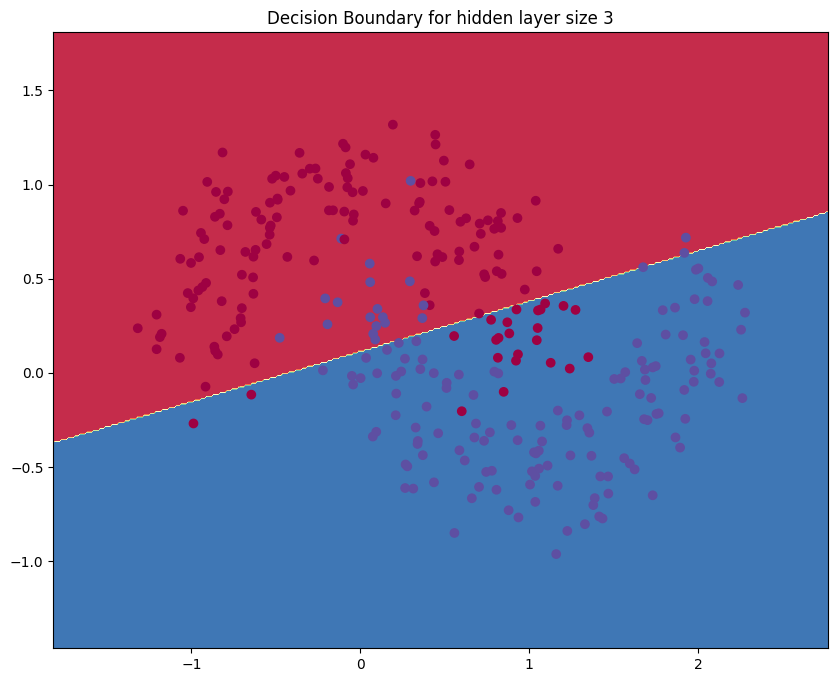

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

# Application on a real dataset

We will now apply our model on a real dataset well known in the world of Machine Learning : le MNIST (https://en.wikipedia.org/wiki/MNIST_database) which is on Sklearn.

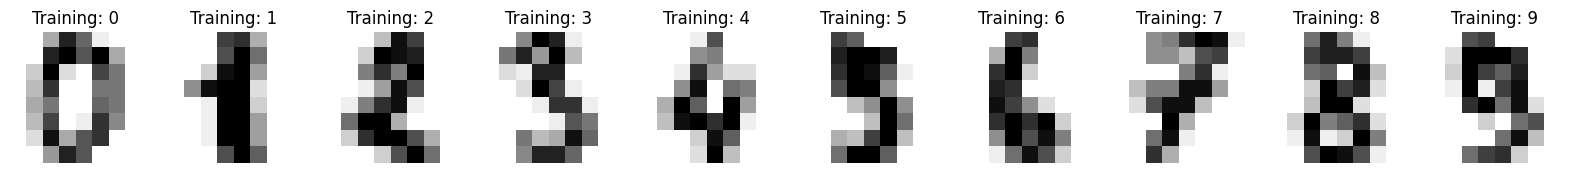

In [ ]:
digits = sklearn.datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
X =  digits.images.reshape((n_samples, -1)) # We reshape the images into vector

y = digits.target


<font color='red'><b> Question 13 </b></font> Complete the input and output dimensions of your network so that it is adapted to the MNIST Dataset and restart the training (be careful, the training will now take a few minutes without additional code optimization).


In [ ]:
X.shape[1]

64

In [ ]:
N = len(X)
d_input = X.shape[1]   # 64
d_output = 10 # 10
d_hidden = 20

# Gradient descent parameter
epsilon = 0.001 # le learning rate doit être plus petit qu'avant sinon l'entrainement diverge

In [ ]:
model = init_model(d_input,d_hidden,d_output)
model = train_model(model,d_hidden, num_epochs=100, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))


Loss at epoch 0: 2.877707
Loss at epoch 50: 2.814646
The final accuracy obtained is : 0.044518642181413465


<font color='red'><b> Question 14 </b></font> :
Divide the MNIST dataset into training and validation datasets.
Find good hyper-parameters on your model. Why create a validation dataset?


In [ ]:
# 1) Split train/validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 2) Configs à tester : (taille cachée, learning rate, epochs)
configs = [
    (64, 0.01, 300),
]

# 3) Boucle d’essai
best_acc = 0.0
best_cfg = None

for d_hidden, lr, epochs in configs:
    epsilon = lr  # ton train_model lit epsilon
    model = init_model(d_input=len(X[0]), d_hidden=d_hidden, d_output=len(set(y)))

    # Entraînement sur le train
    # (tes fonctions train_model/predict/accuracy sont déjà définies)
    # Si besoin, normalise X avant l’entraînement, ex: X = (np.array(X)/16.).tolist()
    # Ici on suppose que train_model s’appuie sur des variables globales X,y,N
    X_bak, y_bak, N_bak = X, y, N
    X, y, N = X_train, y_train, len(X_train)
    model = train_model(model, d_hidden, num_epochs=epochs, print_loss=False)
    X, y, N = X_bak, y_bak, N_bak

    # 4) Évaluer sur la validation
    val_acc = accuracy(y_val, predict(model, X_val))
    print(f"H={d_hidden}, lr={lr}, epochs={epochs} → val_acc={val_acc:.3f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_cfg = (d_hidden, lr, epochs)

print("Meilleurs hyperparamètres :", best_cfg, "| meilleure val_acc =", best_acc)





H=64, lr=0.01, epochs=300 → val_acc=0.704
Meilleurs hyperparamètres : (64, 0.01, 300) | meilleure val_acc = 0.7043478260869566


on cree un dataset de validation pour choisir les hyperparamètres en mesurant la performance sur des données non vues ainsi, on évite le surapprentissage et on sélectionne un modèle qui généralise


<font color='red'><b> Question 14 Bonus </b></font>
How can you ensure that your accuracy on the validation set is significantly different from that of the training set? Find such hyperparameters and plot the accuracy on the training set and on the validation set during the training of your network (according to the epochs). What do you observe?

Pour que la précision (accuracy) du jeu de validation soit significativement différente de celle du jeu d’entraînement, il faut provoquer du surapprentissage (overfitting).
On peut le faire en choisissant des hyperparamètres qui donnent trop de capacité au modèle

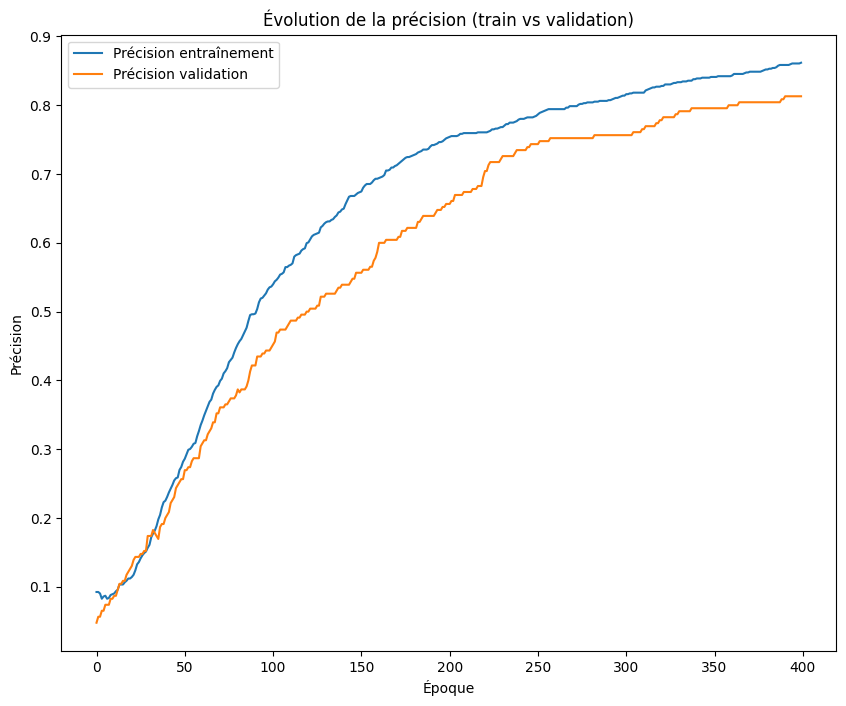

Précision finale sur le train : 0.8618063112078346
Précision finale sur la validation : 0.8130434782608695


In [ ]:
# Séparer le dataset MNIST en 80% pour l'entraînement et 20% pour la validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

import matplotlib.pyplot as plt

# Fonction pour entraîner le modèle et enregistrer la précision à chaque epoch
def entrainement_avec_historique(model, taille_cachee, epochs, lr):
    global epsilon
    epsilon = lr
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    acc_train, acc_val = [], []
    N_train = len(X_train)

    for ep in range(epochs):
        # Étape de propagation avant (forward)
        z1 = forward_layer(X_train, W1, b1)
        a1 = [[sigmoid(v) for v in ligne] for ligne in z1]
        z2 = forward_layer(a1, W2, b2)

        # Calcul du softmax
        probs = []
        for ligne in z2:
            m = max(ligne)
            exps = [exp(v - m) for v in ligne]
            s = sum(exps) if sum(exps) != 0 else 1e-12
            probs.append([v / s for v in exps])

        # Étape de rétropropagation (backpropagation)
        delta2 = [r[:] for r in probs]
        for n in range(N_train):
            delta2[n][int(y_train[n])] -= 1.0
        delta2 = [[v / N_train for v in ligne] for ligne in delta2]

        dW2 = matrix_multiplication(transpose(a1), delta2)
        db2 = [sum(ligne[j] for ligne in delta2) for j in range(len(b2))]

        delta1_lin = matrix_multiplication(delta2, transpose(W2))
        delta1 = []
        for n in range(N_train):
            deriv = [a1[n][h] * (1.0 - a1[n][h]) for h in range(taille_cachee)]
            delta1.append([delta1_lin[n][h] * deriv[h] for h in range(taille_cachee)])

        dW1 = matrix_multiplication(transpose(X_train), delta1)
        db1 = [sum(ligne[h] for ligne in delta1) for h in range(taille_cachee)]

        # --- Mise à jour des poids ---
        W1 = [[w - epsilon * dw for w, dw in zip(W1_ligne, dW1_ligne)] for W1_ligne, dW1_ligne in zip(W1, dW1)]
        b1 = [b - epsilon * db for b, db in zip(b1, db1)]
        W2 = [[w - epsilon * dw for w, dw in zip(W2_ligne, dW2_ligne)] for W2_ligne, dW2_ligne in zip(W2, dW2)]
        b2 = [b - epsilon * db for b, db in zip(b2, db2)]

        # Calcul de la précision à cette epoch
        modele_temp = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        acc_train.append(accuracy(y_train, predict(modele_temp, X_train)))
        acc_val.append(accuracy(y_val,   predict(modele_temp, X_val)))

    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}, acc_train, acc_val

# Choix des hyperparamètres qui provoquent un surapprentissage
d_input, d_output = len(X[0]), len(set(y))
d_hidden = 128      # grande couche cachée
epochs   = 400      # beaucoup d'itérations
lr       = 0.01     # taux d'apprentissage
model0 = init_model(d_input, d_hidden, d_output)

# Entraînement du modèle et récupération de l'historique
modele_final, hist_train, hist_val = entrainement_avec_historique(model0, d_hidden, epochs, lr)

# Affichage des courbes de précision
plt.plot(hist_train, label="Précision entraînement")
plt.plot(hist_val, label="Précision validation")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.title("Évolution de la précision (train vs validation)")
plt.show()

print("Précision finale sur le train :", hist_train[-1])
print("Précision finale sur la validation :", hist_val[-1])


On voit que la précision sur le jeu d’entraînement continue d’augmenter alors que celle du jeu de validation se stabilise ou diminue.
Cela montre un surapprentissage : le modèle apprend trop bien les données d’entraînement et généralise mal sur des données nouvelles.

<font color='red'><b> Questions 15 (Bonus) </b></font> There are many ways to make your neural network more efficient, you can find out about the following points of improvement of your choice, explain their usefulness and implement those you want by analyzing the new results obtained (on the game of data of your choice). Don’t hesitate to be curious and look for good resources to help you!

* UUsing the Numpy library to handle matrix operations, rather than using Python lists of lists (this will simplify your code and should reduce training times by several orders of magnitude depending on the size of your network, allowing you to to train larger networks and better optimize hyperparameters on the MNIST dataset)
* Add Weight Decay (https://fr.wikipedia.org/wiki/Weight_decay)
* Stochastic or Batch Gradient Descent (https://fr.wikipedia.org/wiki/Algorithme_du_gradient_stochastique)
* Added more layers (make the number of layers a model parameter)